In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
%config IPCompleter.greedy=True

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', 
                                       train = True, 
#                                        download = True,
                                        download = False,
                                       transform = transform)


testset = torchvision.datasets.CIFAR10(root='./data', 
                                      train = False, 
#                                       download = True,
                                       download = False,
                                      transform = transform)


In [18]:
trainloader = torch.utils.data.DataLoader(trainset, 
                                         batch_size=16, 
                                         shuffle = True, 
                                         num_workers=4)


testloader = torch.utils.data.DataLoader(testset, 
                                        batch_size=16, 
                                        shuffle = False, 
                                        num_workers = 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

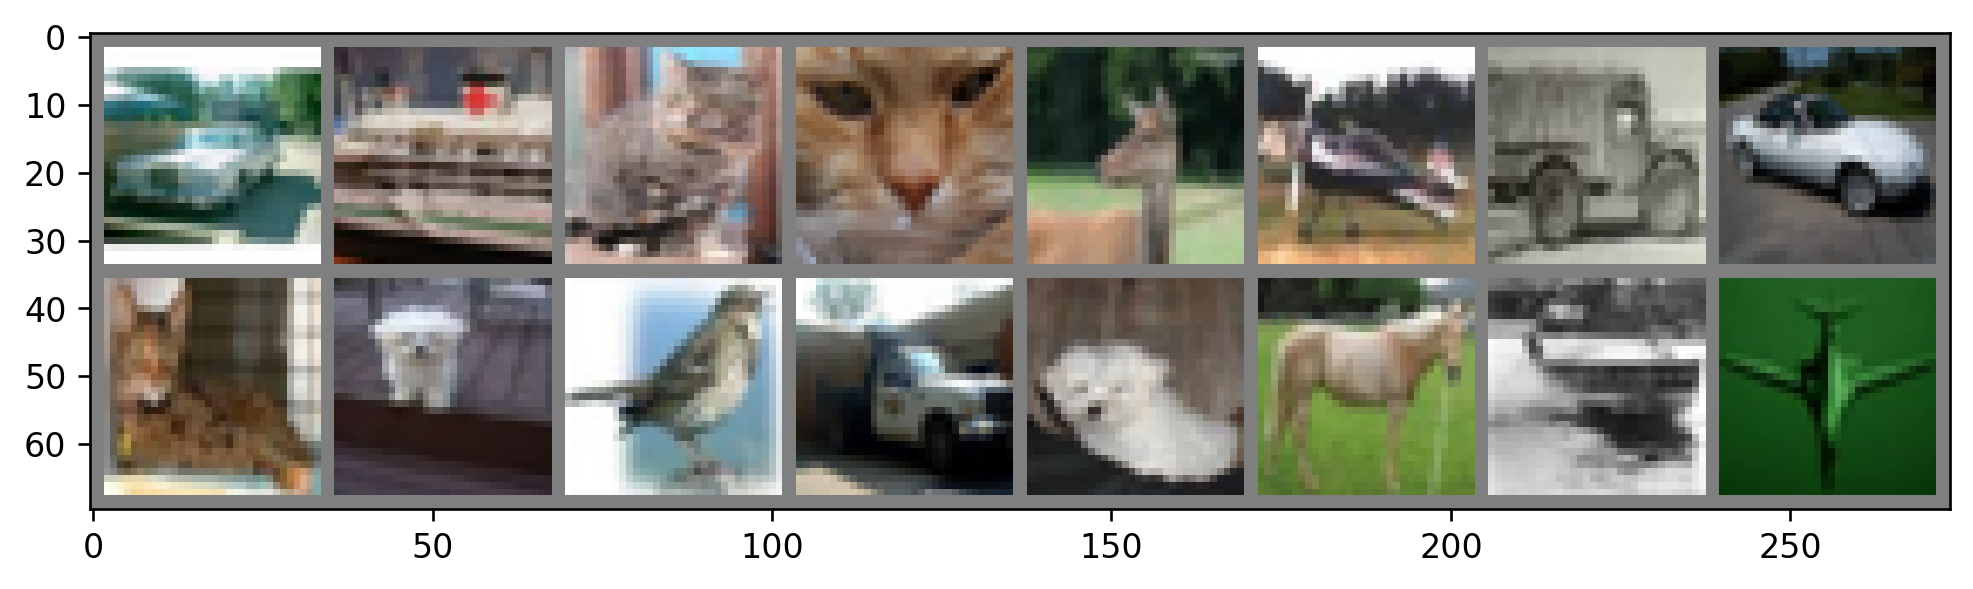

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(num=None, figsize=(10, 4), dpi=240, facecolor='w', edgecolor='k')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show

dataiter = iter(trainloader)
imgs, labels = dataiter.next()

imshow(torchvision.utils.make_grid(imgs))



In [20]:
print(' '.join('%8s' % classes[labels[i]] for i in range(len(labels))))

     car     ship      cat      cat     deer    plane    truck      car      cat      dog     bird    truck      dog    horse     ship    plane


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 24, 5)
#         self.conv3 = nn.Conv2d(24, 36, 3)
        x = torch.randn(3, 32, 32).view(-1, 3, 32, 32)
        self.to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self.to_linear, 128)
#         self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self.to_linear)
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
#     def num_flat_features(self, x):
#         size = x.size()[1: ]
#         features = 1
#         for s in size:
#             features *= s
#         return features
    
    def convs(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
#         x = self.pool(F.relu(self.conv3(x)))
        size = x.size()[1:]
#         print(size)
        if self.to_linear is None:
            features = 1
            for s in size:
                features *= s
            self.to_linear = features
            
        return x
    

net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 24, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2400, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [56]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.0000979, momentum = 0.9)

Epoch - 1


510it [00:06, 71.79it/s]

Loss - 0.1387723227404058 Batches_passed : 500


1013it [00:13, 69.59it/s]

Loss - 0.1318408165536821 Batches_passed : 1500


1512it [00:19, 75.27it/s]

Loss - 0.13904870856273918 Batches_passed : 3000


2011it [00:26, 70.07it/s]

Loss - 0.13799408621154727 Batches_passed : 5000


2512it [00:33, 76.34it/s]

Loss - 0.14146272370917723 Batches_passed : 7500


3015it [00:40, 75.60it/s]

Loss - 0.1401766322106123 Batches_passed : 10500


3125it [00:41, 75.08it/s]

Epoch - 2



509it [00:06, 75.86it/s]

Loss - 0.12779555909708143 Batches_passed : 500


1011it [00:13, 77.20it/s]

Loss - 0.1378909415146336 Batches_passed : 1500


1512it [00:19, 74.31it/s]

Loss - 0.13373958480358122 Batches_passed : 3000


2011it [00:26, 73.78it/s]

Loss - 0.1379367775861174 Batches_passed : 5000


2513it [00:33, 75.99it/s]

Loss - 0.13055922672897577 Batches_passed : 7500


3009it [00:39, 81.25it/s]

Loss - 0.13576706985803322 Batches_passed : 10500


3125it [00:41, 76.19it/s]

Epoch - 3



510it [00:06, 80.49it/s]

Loss - 0.13441920418664813 Batches_passed : 500


1013it [00:13, 77.08it/s]

Loss - 0.1287090751263313 Batches_passed : 1500


1510it [00:19, 74.14it/s]

Loss - 0.13023527778126298 Batches_passed : 3000


2006it [00:26, 65.35it/s]

Loss - 0.1241911446209997 Batches_passed : 5000


2509it [00:33, 72.78it/s]

Loss - 0.12953435373143293 Batches_passed : 7500


3015it [00:40, 75.35it/s]

Loss - 0.1312652564048767 Batches_passed : 10500


3125it [00:42, 73.72it/s]

Epoch - 4



511it [00:06, 75.49it/s]

Loss - 0.12574101312551647 Batches_passed : 500


1009it [00:13, 62.12it/s]

Loss - 0.12401078347861767 Batches_passed : 1500


1513it [00:20, 75.73it/s]

Loss - 0.1272961005391553 Batches_passed : 3000


2012it [00:26, 79.09it/s]

Loss - 0.12557115472480654 Batches_passed : 5000


2515it [00:33, 74.14it/s]

Loss - 0.1278574933540076 Batches_passed : 7500


3009it [00:40, 70.89it/s]

Loss - 0.12660431665927172 Batches_passed : 10500


3125it [00:41, 75.14it/s]

Epoch - 5



512it [00:06, 71.72it/s]

Loss - 0.12415907167643309 Batches_passed : 500


1012it [00:13, 67.19it/s]

Loss - 0.11655247835908085 Batches_passed : 1500


1509it [00:20, 72.54it/s]

Loss - 0.12941917566303163 Batches_passed : 3000


2016it [00:27, 80.46it/s]

Loss - 0.11975109913945198 Batches_passed : 5000


2510it [00:34, 69.80it/s]

Loss - 0.12512784743215888 Batches_passed : 7500


3014it [00:41, 72.27it/s]

Loss - 0.12260776600893587 Batches_passed : 10500


3125it [00:43, 72.54it/s]


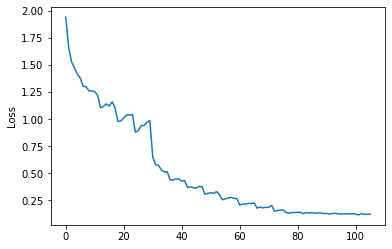

In [57]:
from tqdm import tqdm

# loss_track = []
for epoch in range(5):
    running_loss = 0.0
    batch_count = 0
    print(f"Epoch - {epoch + 1}")
    for i, (inputs, labels) in tqdm(enumerate(trainloader)):
        
        net.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 500 == 499:
            batch_count += 1 + i
            batch_loss = running_loss/500
            loss_track.append(batch_loss)
            print(f"Loss - {batch_loss} Batches_passed : {batch_count}")
            running_loss = 0.0

import matplotlib.pyplot as plt
plt.plot(loss_track)
plt.ylabel("Loss")
plt.show()

In [26]:
PATH = "./cifar_net.pth"

# torch.save(net.state_dict(), PATH)

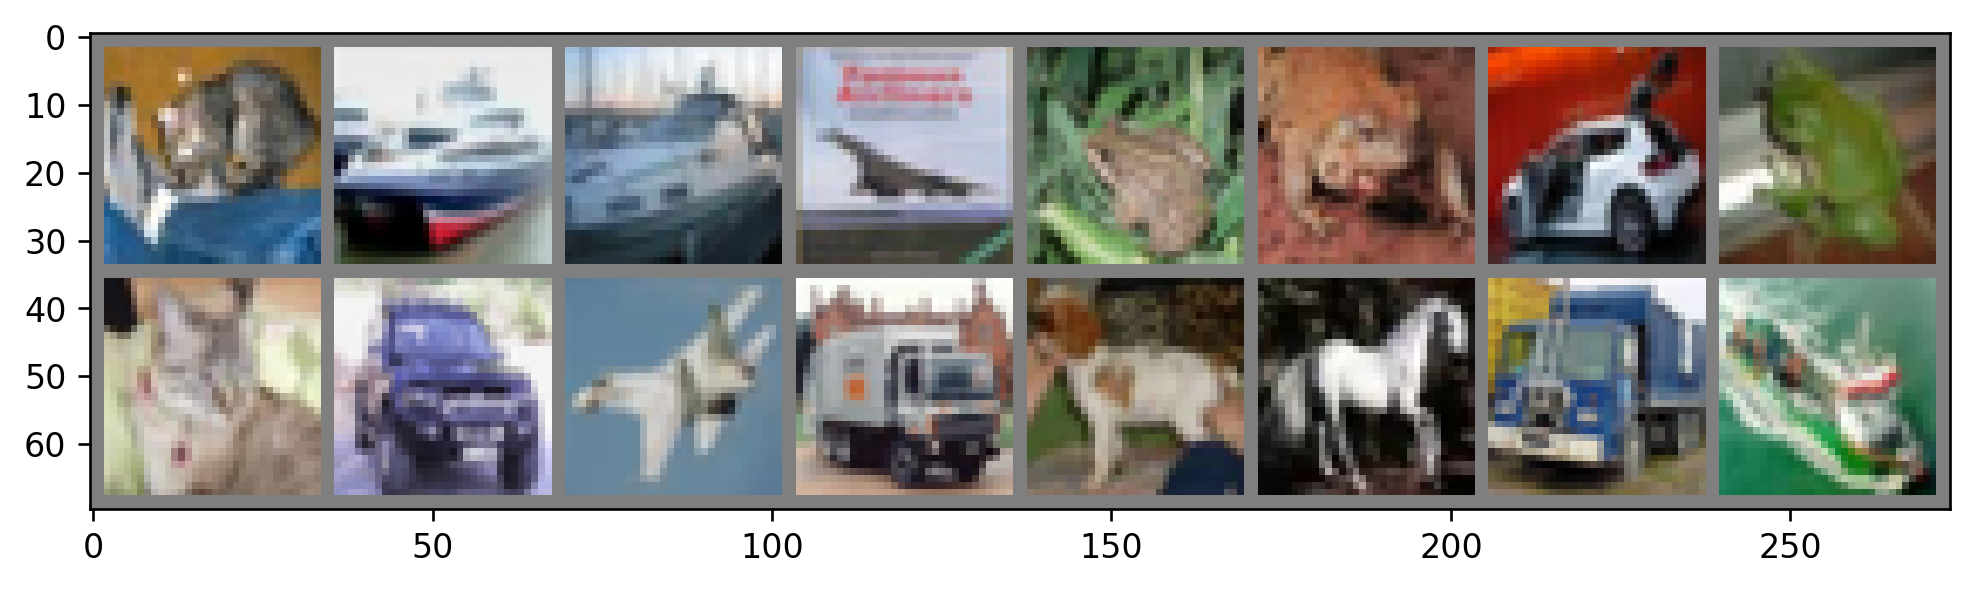

In [66]:
dataiter = iter(testloader)

images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))



In [67]:
print(' '.join('%8s' % classes[labels[i]] for i in range(len(labels))))

     cat     ship     ship    plane     frog     frog      car     frog      cat      car    plane    truck      dog    horse    truck     ship


In [8]:
net = Net()

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [83]:
outputs = net(images)

In [75]:
_, predicted = torch.max(outputs, 1)
# print(predicted)
print(' '.join('%8s' % classes[predicted[j]] for j in range(len(labels))))

     cat      car      car    plane     frog     frog      car     frog      cat      car    plane    truck      dog    horse    truck     ship


In [25]:
correct = 0
total = 0

with torch.no_grad():
    for data in tqdm(trainloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f"Train acc for {total} images : {correct * 100 / total}")

    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Train acc for {total} images : {correct * 100 / total}")

  0%|          | 0/625 [00:00<?, ?it/s]

Train acc for 50000 images : 99.476


100%|██████████| 625/625 [00:04<00:00, 145.68it/s]

Train acc for 60000 images : 93.81333333333333


In [28]:
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i, label in enumerate(labels):
            class_correct[label] += c[i]
            class_total[label] += 1
    
    for i in range(len(classes)):
        print(f"Accuracy of {classes[i]} : {class_correct[i] * 100 / class_total[i]}")
            

100%|██████████| 625/625 [00:04<00:00, 150.00it/s]

Accuracy of plane : 70.9000015258789
Accuracy of car : 79.4000015258789
Accuracy of bird : 53.80000305175781
Accuracy of cat : 44.30000305175781
Accuracy of deer : 58.500003814697266
Accuracy of dog : 52.900001525878906
Accuracy of frog : 74.20000457763672
Accuracy of horse : 67.5
Accuracy of ship : 77.60000610351562
Accuracy of truck : 75.9000015258789


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [111]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [13]:
net.to(device)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 24, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2400, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.000979, momentum = 0.9)

Epoch - 1


525it [00:04, 118.67it/s]

Loss - 0.1230765985250473 Batches_passed : 500


1015it [00:09, 108.53it/s]

Loss - 0.12787314097583294 Batches_passed : 1500


1524it [00:13, 124.81it/s]

Loss - 0.13575682336091996 Batches_passed : 3000


2029it [00:17, 125.18it/s]

Loss - 0.14314093360304833 Batches_passed : 5000


2525it [00:21, 146.18it/s]

Loss - 0.14243588218092917 Batches_passed : 7500


3025it [00:24, 148.01it/s]

Loss - 0.13965072701871395 Batches_passed : 10500


3125it [00:25, 121.80it/s]


Epoch - 2


526it [00:04, 137.41it/s]

Loss - 0.09600712437927723 Batches_passed : 500


1020it [00:08, 142.17it/s]

Loss - 0.10757017654180527 Batches_passed : 1500


1510it [00:12, 86.96it/s] 

Loss - 0.10158833055198192 Batches_passed : 3000


2020it [00:16, 125.63it/s]

Loss - 0.10646121026575565 Batches_passed : 5000


2518it [00:20, 125.38it/s]

Loss - 0.11227976839244366 Batches_passed : 7500


3024it [00:24, 126.28it/s]

Loss - 0.1143176746070385 Batches_passed : 10500


3125it [00:24, 125.75it/s]

Epoch - 3



513it [00:03, 113.77it/s]

Loss - 0.08258217982947827 Batches_passed : 500


1015it [00:08, 122.93it/s]

Loss - 0.0791248377263546 Batches_passed : 1500


1516it [00:12, 137.40it/s]

Loss - 0.08186412164568901 Batches_passed : 3000


2013it [00:16, 126.43it/s]

Loss - 0.08736411857604981 Batches_passed : 5000


2519it [00:20, 118.40it/s]

Loss - 0.07654046249389648 Batches_passed : 7500


3022it [00:24, 140.70it/s]

Loss - 0.08318746408820152 Batches_passed : 10500


3125it [00:24, 125.05it/s]

Epoch - 4



518it [00:03, 118.48it/s]

Loss - 0.06275243920087814 Batches_passed : 500


1006it [00:09, 72.17it/s]

Loss - 0.05964509391784668 Batches_passed : 1500


1513it [00:14, 84.64it/s] 

Loss - 0.06306437656283378 Batches_passed : 3000


2016it [00:20, 85.40it/s]

Loss - 0.06627799370884896 Batches_passed : 5000


2517it [00:24, 154.35it/s]

Loss - 0.06139246091246605 Batches_passed : 7500


3012it [00:28, 86.14it/s] 

Loss - 0.06459435927867889 Batches_passed : 10500


3125it [00:29, 105.86it/s]

Epoch - 5



519it [00:03, 166.93it/s]

Loss - 0.04643593336641789 Batches_passed : 500


1002it [00:06, 111.91it/s]

Loss - 0.04437878453731537 Batches_passed : 1500


1536it [00:11, 180.42it/s]

Loss - 0.05192794144153595 Batches_passed : 3000


2010it [00:15, 84.75it/s] 

Loss - 0.04861686436831951 Batches_passed : 5000


2517it [00:20, 151.01it/s]

Loss - 0.04802408301830292 Batches_passed : 7500


3009it [00:25, 84.61it/s] 

Loss - 0.04936305655539036 Batches_passed : 10500


3125it [00:26, 117.68it/s]


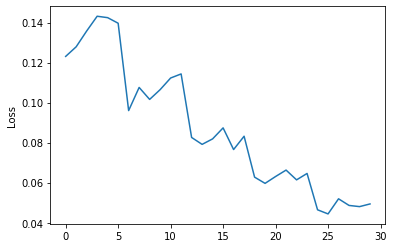

In [15]:
from tqdm import tqdm

loss_track = []
for epoch in range(5):
    running_loss = 0.0
    batch_count = 0
    print(f"Epoch - {epoch + 1}")
    for i, data in tqdm(enumerate(trainloader)):
        inputs, labels = data[0].to(device), data[1].to(device)
        net.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 500 == 499:
            batch_count += 1 + i
            batch_loss = running_loss/500
            loss_track.append(batch_loss)
            print(f"Loss - {batch_loss} Batches_passed : {batch_count}")
            running_loss = 0.0

import matplotlib.pyplot as plt
plt.plot(loss_track)
plt.ylabel("Loss")
plt.show()